# Decision Tree

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not<br>
Marital.Status : marital status of a person<br>
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government <br>
Work Experience : Work experience of an individual person<br>
Urban : Whether that person belongs to urban area or not<br>

### EDA

In [75]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [5]:
data= pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
data.shape

(600, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [9]:
data[data.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [10]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [12]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

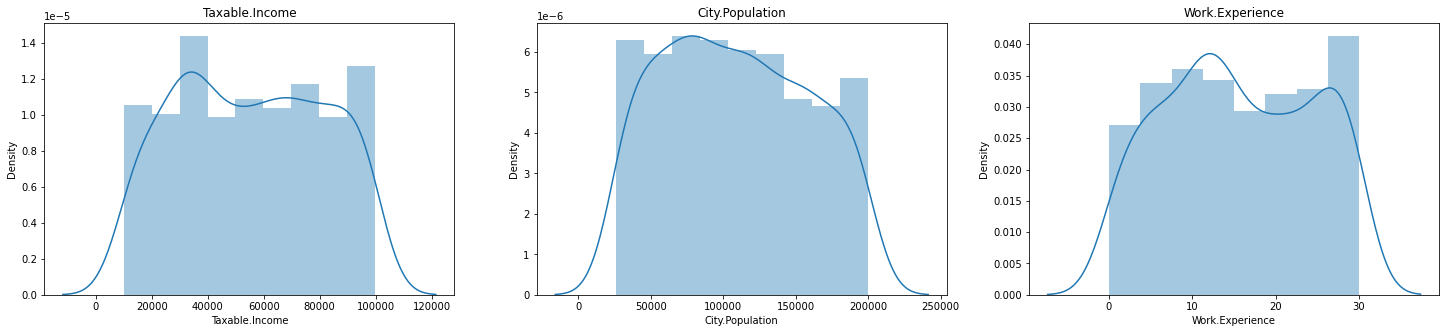

In [11]:
#PLotting numeric columns to get insights 
fig, ax = plt.subplots(1, 3,figsize=(25,5))
sns.distplot(data['Taxable.Income'],ax=ax[0])
sns.distplot(data['City.Population'],ax=ax[1])
sns.distplot(data['Work.Experience'],ax=ax[2])
ax[0].set_title("Taxable.Income")
ax[1].set_title("City.Population")
ax[2].set_title("Work.Experience")
plt.show()


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


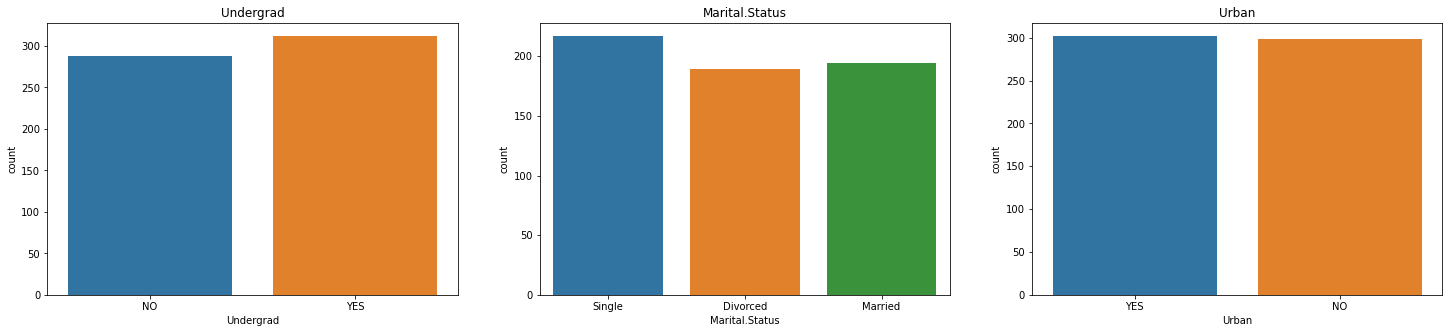

In [26]:
#PLotting non-numeric columns to get insights 
fig, ax = plt.subplots(1, 3,figsize=(25,5))
sns.countplot(data['Undergrad'],ax=ax[0])
sns.countplot(data['Marital.Status'],ax=ax[1])
sns.countplot(data['Urban'],ax=ax[2])
ax[0].set_title("Undergrad")
ax[1].set_title("Marital.Status")
ax[2].set_title("Urban")
plt.show()

#### Replacing those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [30]:
data['Taxable.Income'] = pd.cut( x = data['Taxable.Income'], bins = [10000,30000,100000], labels = ['Risky','good'])

In [31]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,good,39492,7,YES
596,YES,Divorced,good,55369,2,YES
597,NO,Divorced,good,154058,0,YES
598,YES,Married,good,180083,17,NO


In [32]:
#Label encoding nonnumeric values to numeric values
from sklearn.preprocessing import LabelEncoder
data["Undergrad"] = LabelEncoder().fit_transform(data["Undergrad"])
data["Marital.Status"] = LabelEncoder().fit_transform(data["Marital.Status"])
data["Taxable.Income"] = LabelEncoder().fit_transform(data["Taxable.Income"])
data["Urban"] = LabelEncoder().fit_transform(data["Urban"])
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0


# Good = 1 and Risky = 0 

In [34]:
data.describe()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,0.793333,108747.368333,15.558333,0.503333
std,0.500017,0.821958,0.405252,49850.075134,8.842147,0.500406
min,0.000000,0.000000,0.000000,25779.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,66966.750000,8.000000,0.000000
50%,1.000000,1.000000,1.000000,106493.500000,15.000000,1.000000
75%,1.000000,2.000000,1.000000,150114.250000,24.000000,1.000000
max,1.000000,2.000000,1.000000,199778.000000,30.000000,1.000000


In [38]:
#Normalizing data as there is sclaing problem
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [39]:
data_norm = norm_func(data)

In [44]:
data_norm.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0.0,1.0,1.0,0.139472,0.333333,1.0
1,1.0,0.0,1.0,0.622394,0.600000,1.0
2,0.0,0.5,1.0,0.772568,1.000000,1.0
3,1.0,1.0,1.0,0.962563,0.500000,1.0
4,0.0,0.5,1.0,0.010081,0.933333,0.0
5,0.0,0.0,1.0,0.520710,0.000000,0.0
6,0.0,0.0,1.0,0.316732,0.266667,1.0
7,1.0,1.0,1.0,0.606176,0.100000,1.0
8,0.0,1.0,1.0,0.440819,0.400000,1.0
9,1.0,0.0,1.0,0.745424,0.133333,1.0


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

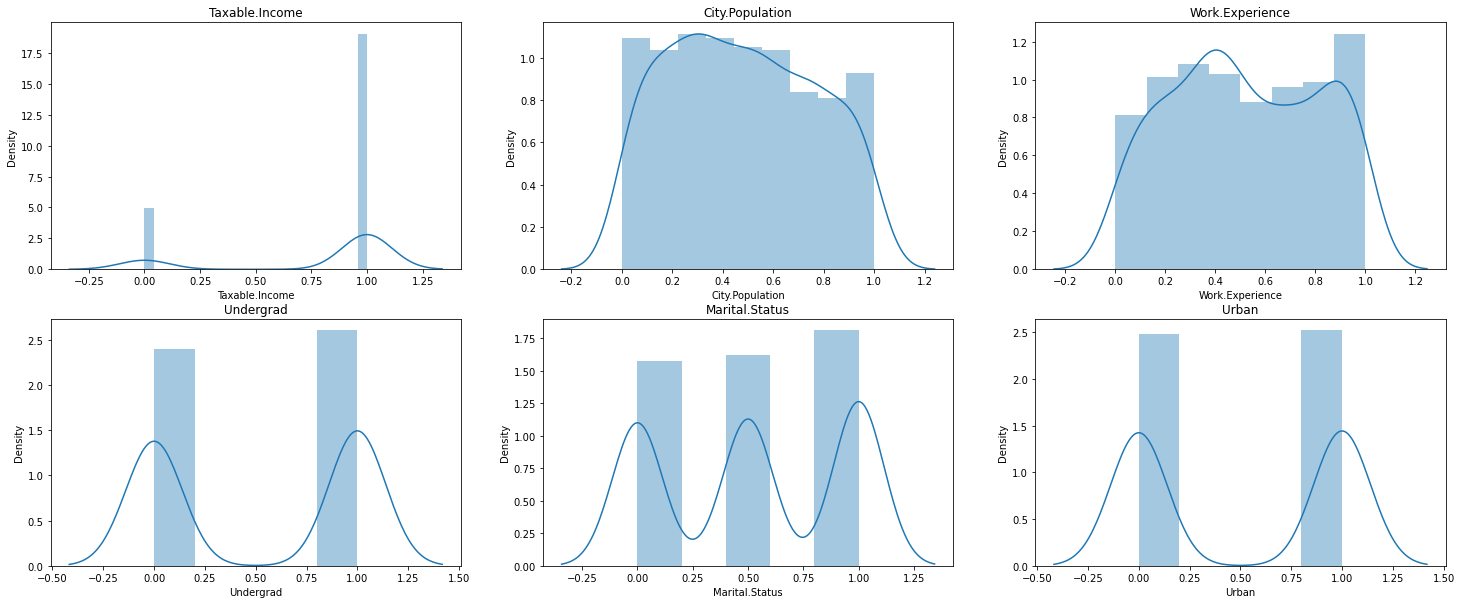

In [47]:
#Visualizing the data

fig, ax = plt.subplots(2, 3,figsize=(25,10))
sns.distplot(data_norm['Taxable.Income'],ax=ax[0,0])
sns.distplot(data_norm['City.Population'],ax=ax[0,1])
sns.distplot(data_norm['Work.Experience'],ax=ax[0,2])
sns.distplot(data_norm['Undergrad'],ax=ax[1,0])
sns.distplot(data_norm['Marital.Status'],ax=ax[1,1])
sns.distplot(data_norm['Urban'],ax=ax[1,2])
ax[0,0].set_title("Taxable.Income")
ax[0,1].set_title("City.Population")
ax[0,2].set_title("Work.Experience")
ax[1,0].set_title("Undergrad")
ax[1,1].set_title("Marital.Status")
ax[1,2].set_title("Urban")
plt.show()


In [ ]:
#Splitting the data into X and Y to further divide it into train and test split data

In [57]:
X= data_norm.drop(['Taxable.Income'],axis = 1)
X.head() , X.tail()

(   Undergrad  Marital.Status  City.Population  Work.Experience  Urban
 0        0.0             1.0         0.139472         0.333333    1.0
 1        1.0             0.0         0.622394         0.600000    1.0
 2        0.0             0.5         0.772568         1.000000    1.0
 3        1.0             1.0         0.962563         0.500000    1.0
 4        0.0             0.5         0.010081         0.933333    0.0,
      Undergrad  Marital.Status  City.Population  Work.Experience  Urban
 595        1.0             0.0         0.078811         0.233333    1.0
 596        1.0             0.0         0.170058         0.066667    1.0
 597        0.0             0.0         0.737240         0.000000    1.0
 598        1.0             0.5         0.886810         0.566667    0.0
 599        0.0             0.0         0.760683         0.533333    0.0)

In [54]:
Y = data_norm['Taxable.Income']
Y.head(),Y.tail()

(0    1.0
 1    1.0
 2    1.0
 3    1.0
 4    1.0
 Name: Taxable.Income, dtype: float64,
 595    1.0
 596    1.0
 597    1.0
 598    1.0
 599    1.0
 Name: Taxable.Income, dtype: float64)

In [77]:
#Splitting the data into train and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

## Building C5.0 Model

In [78]:
model_entropy = DecisionTreeClassifier(criterion='entropy',max_depth =3)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

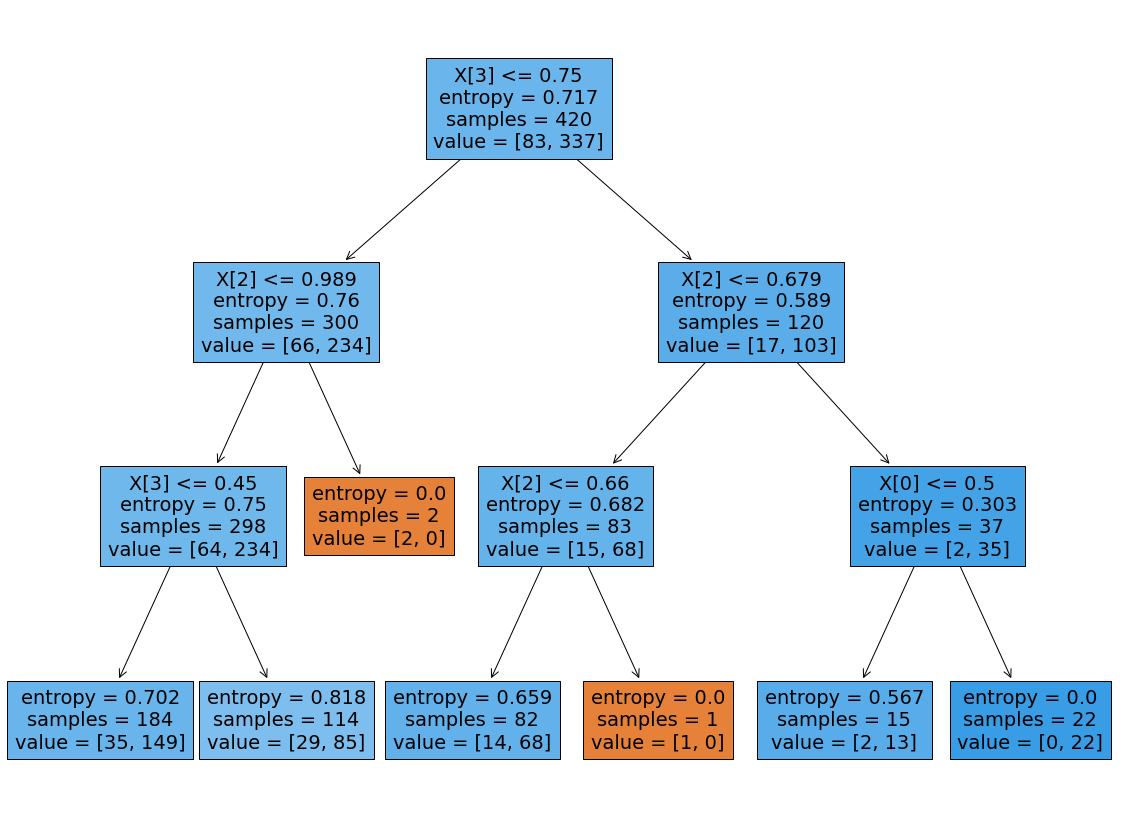

In [80]:
#Plotting Decision tree
fig = plt.figure(figsize = (20,15))
tree.plot_tree(model_entropy, filled = True)
plt.show()

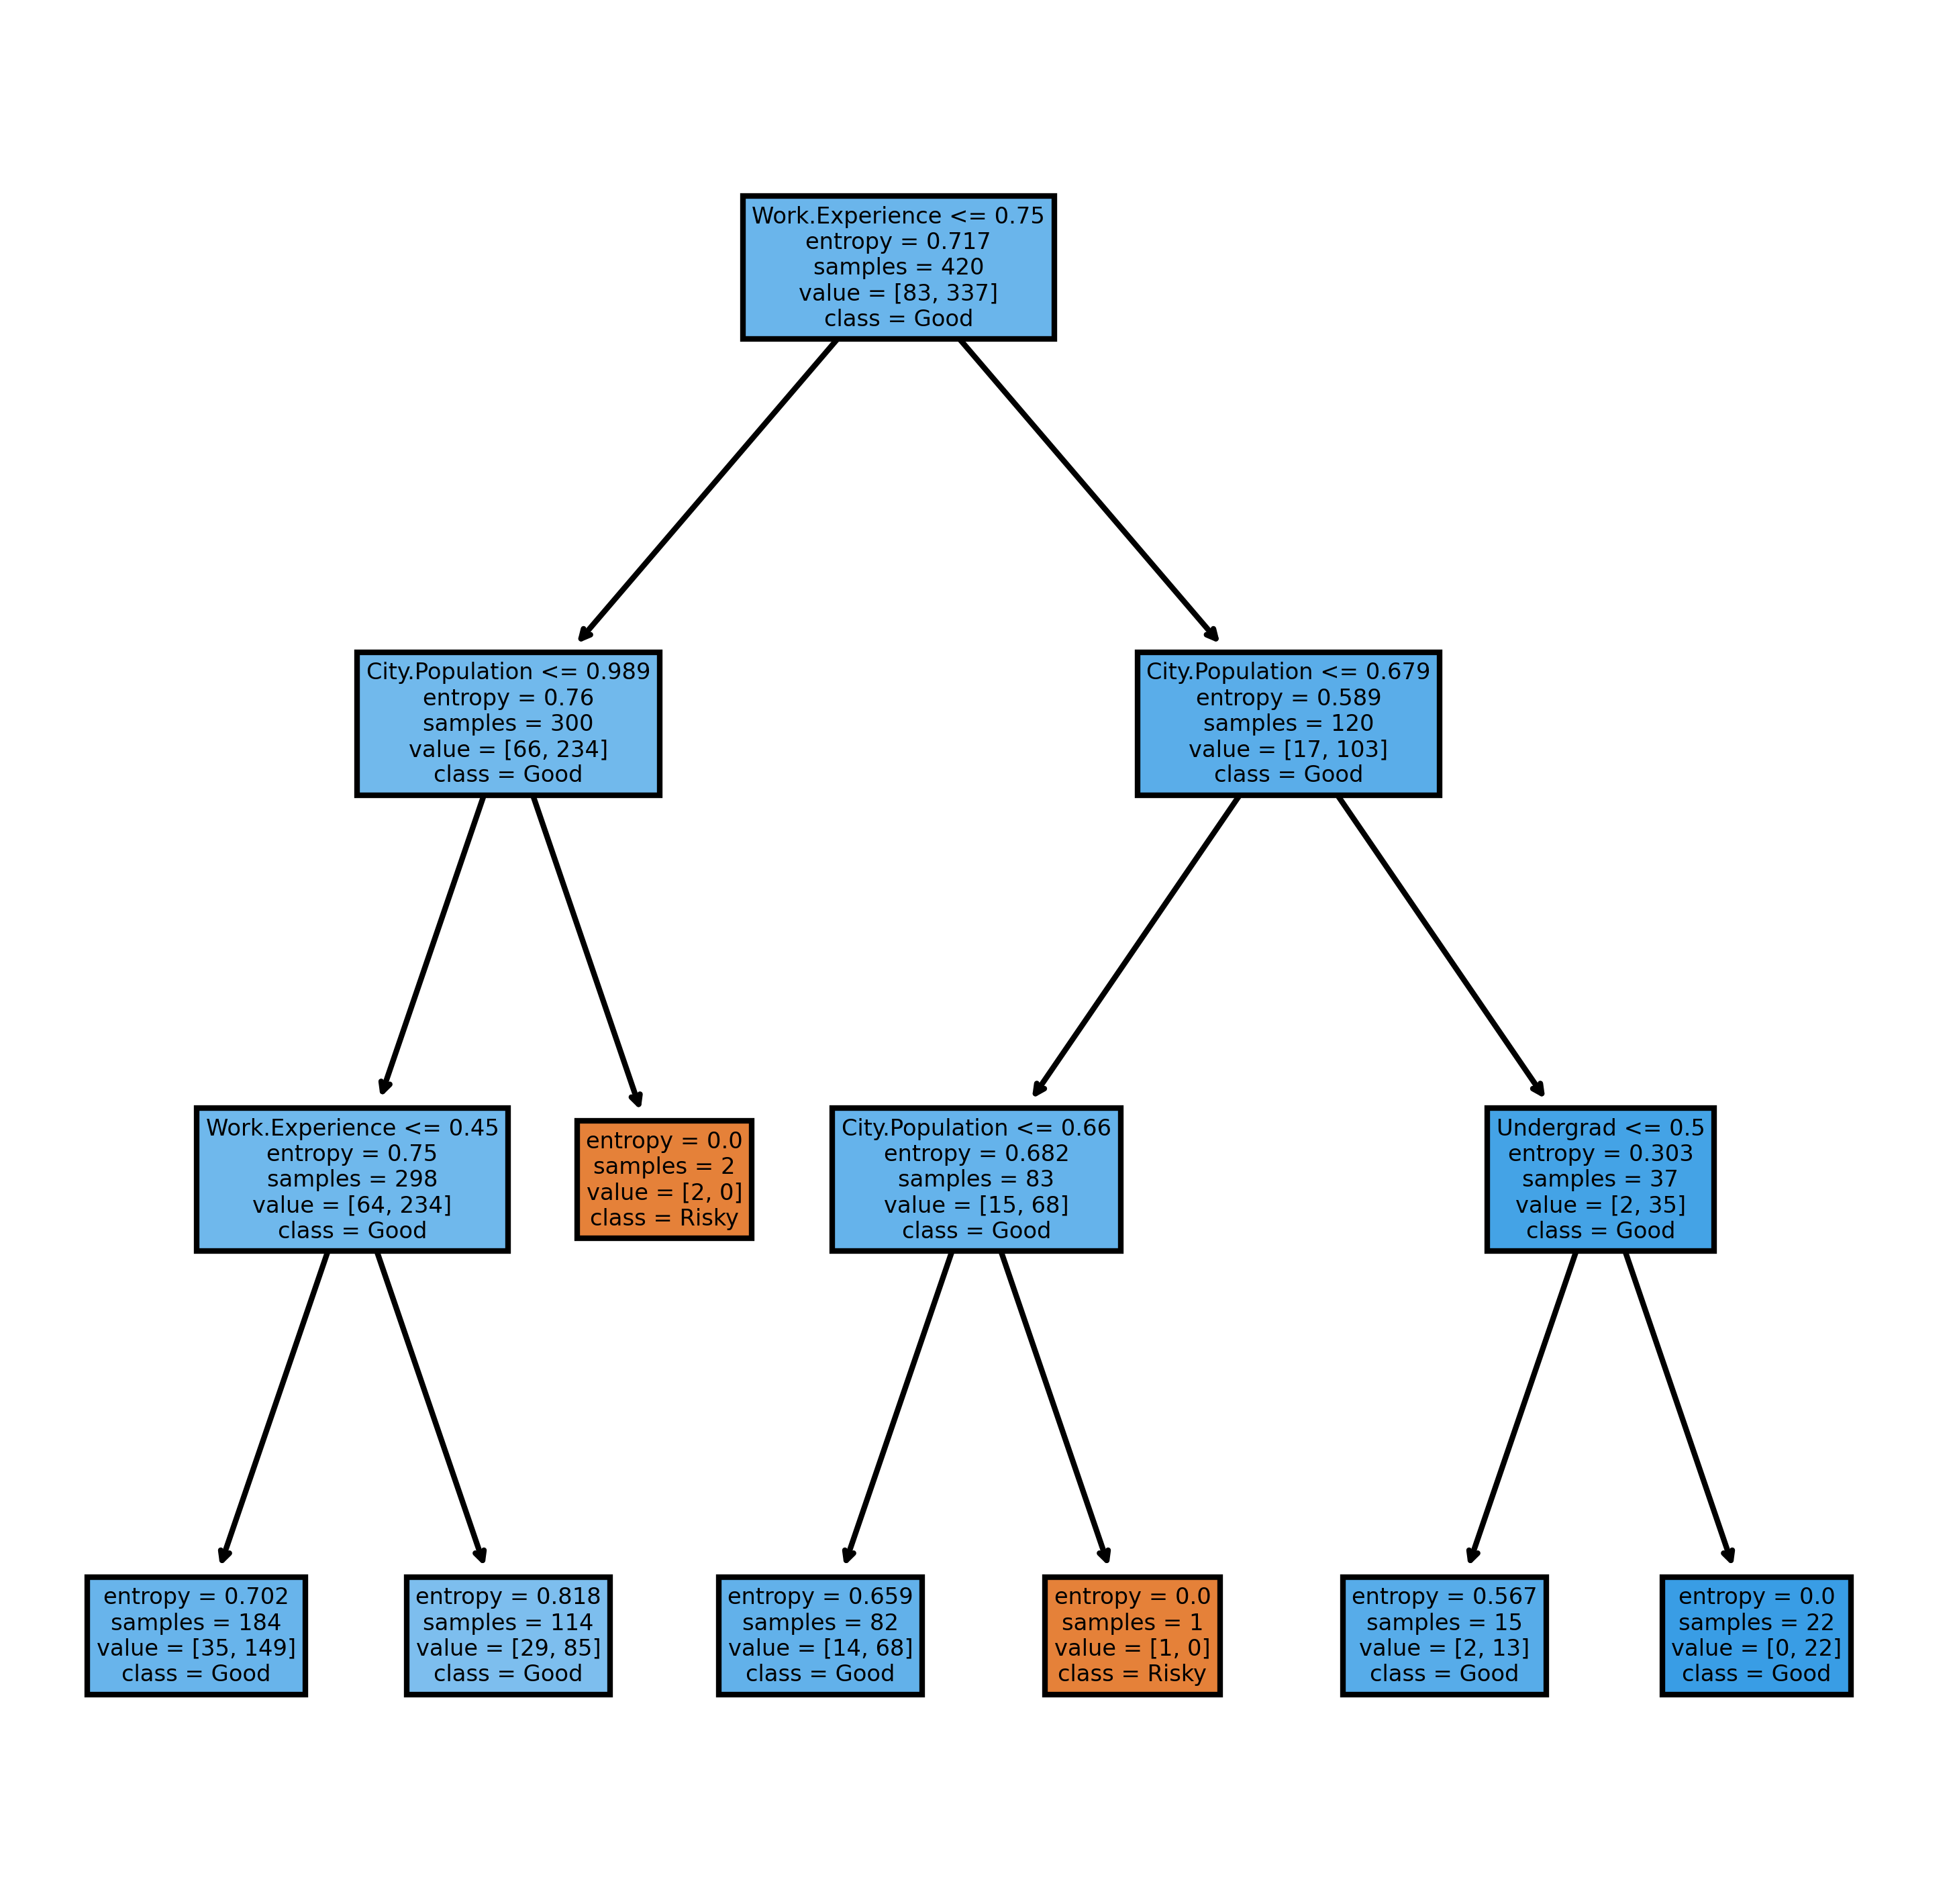

In [81]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_entropy,
               feature_names = fn, 
               class_names=cn,
               filled = True)
plt.show()

## Model Prediction

In [82]:
preds = model_entropy.predict(x_test)
preds

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [83]:
pd.Series(preds).value_counts()

1.0    178
0.0      2
dtype: int64

In [84]:
#Model Accuracy
accuracy_score(y_test,preds)

0.7611111111111111

# OR

In [86]:
print("Model Accuracy:-",round((model_entropy.score(x_test,y_test))*100,2),"%")

Model Accuracy:- 76.11 %


# Building CART Model

In [88]:
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

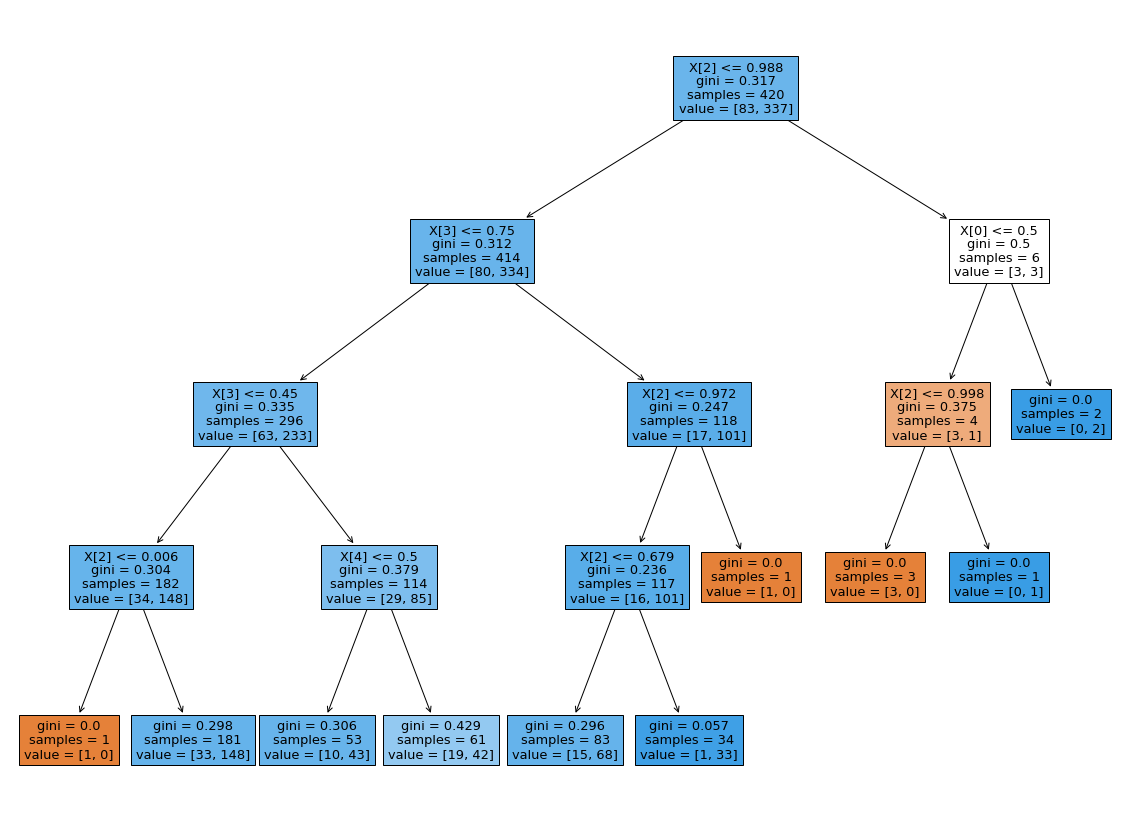

In [89]:
from sklearn import tree
#plotting Decision ree
fig = plt.figure(figsize = (20,15))
tree.plot_tree(model_gini, filled = True)
plt.show()

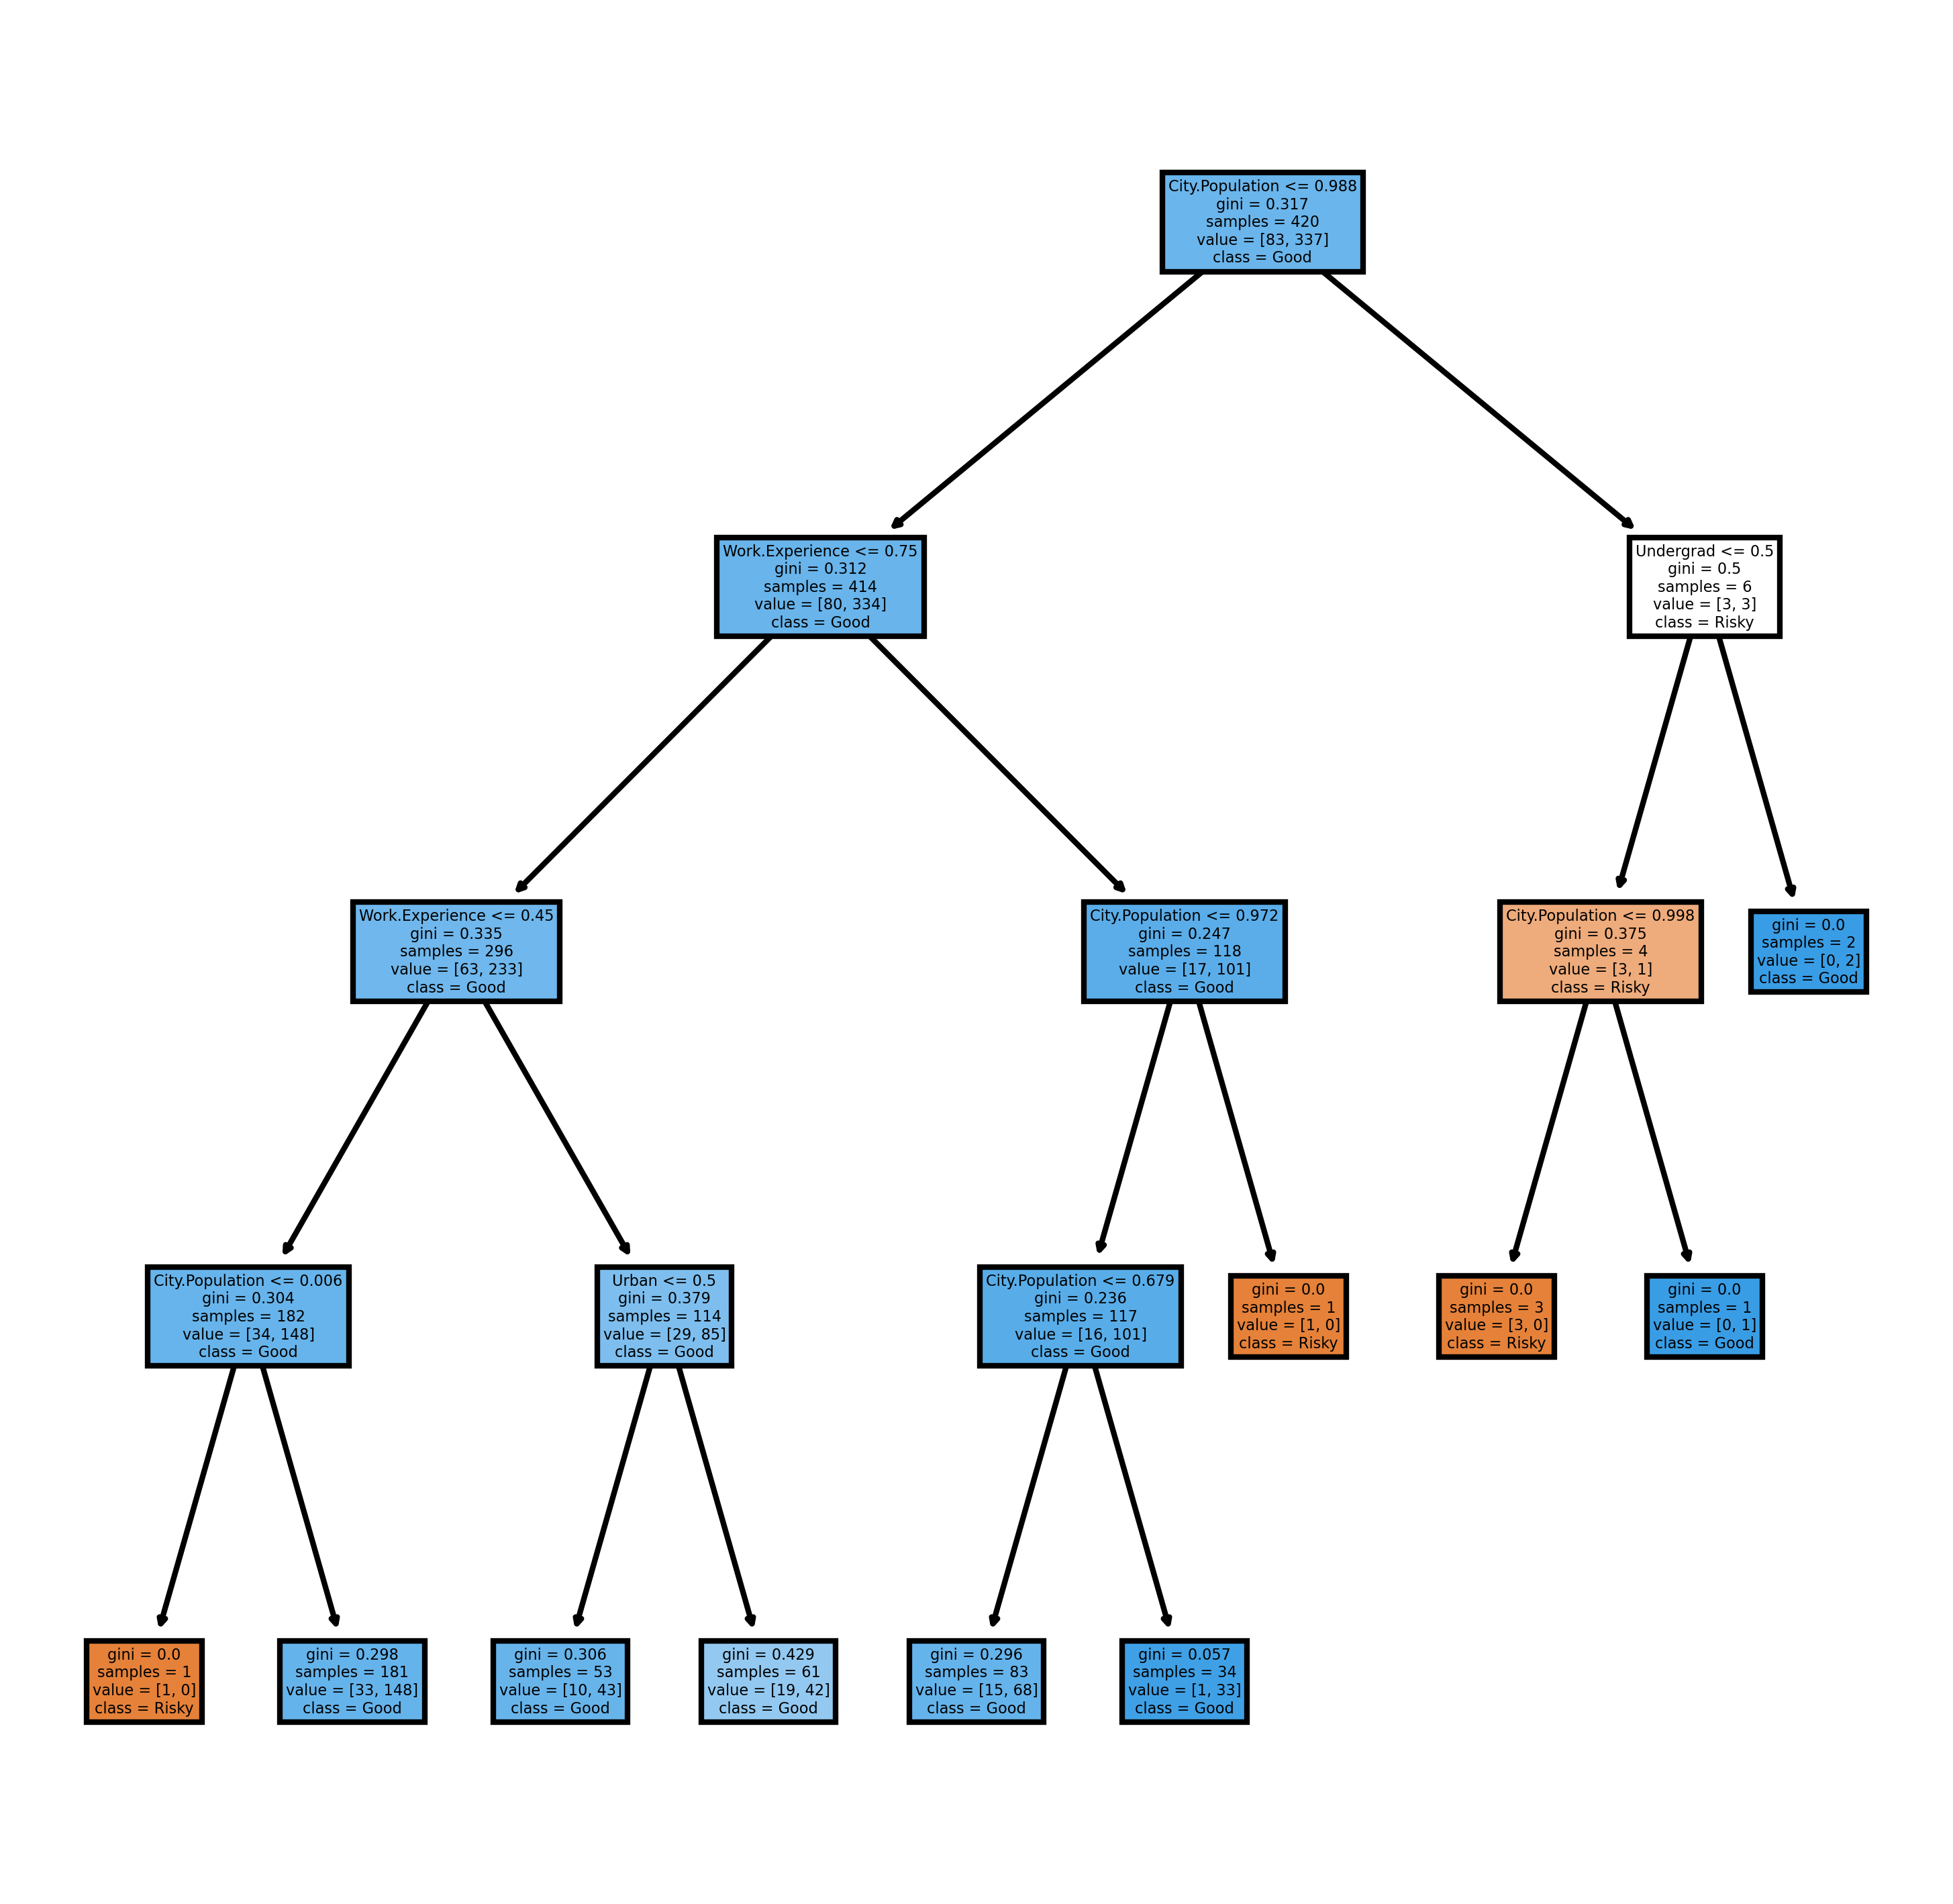

In [90]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True)
plt.show()

## Model Prediction

In [92]:
pred_x_test = model_gini.predict(x_test)

In [93]:
# Checking accuracy of model
accuracy_score(y_test,pred_x_test)

0.7666666666666667

In [98]:
confusion_matrix(y_test,pred_x_test)

array([[  0,  41],
       [  1, 138]], dtype=int64)

In [99]:
#prediction train data
pred_x_train = model_gini.predict(x_train)

In [100]:
# Checking accuracy of model
accuracy_score(y_train,pred_x_train)

0.8142857142857143

In [101]:
confusion_matrix(y_train,pred_x_train)

array([[  5,  78],
       [  0, 337]], dtype=int64)